In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pickle
from sklearn.preprocessing import normalize
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

### GLOBAL VARIABLES

In [2]:
NJOBS = -1
SEED = 10

### LOAD DATASET

In [3]:
train_features = pd.read_pickle('data/processed/X.pkl')

In [4]:
train_features.shape

(212665, 1205)

### NORMALIZE DATASET

In [5]:
train_features.fillna(0, inplace=True)

In [6]:
data_scaled = normalize(train_features)

### PLOT ELBOW

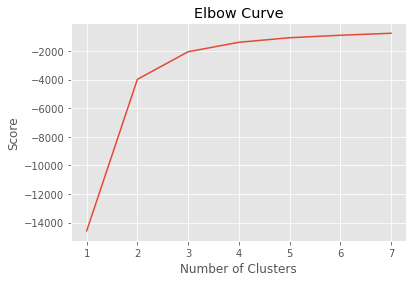

In [7]:
Nc = range(1, 8)
kmeans = [KMeans(n_clusters=i, n_jobs=NJOBS, random_state=SEED) for i in Nc]
kmeans
score = [kmeans[i].fit(data_scaled).score(data_scaled) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xticks([i for i in Nc])
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

### PLOT SILHOUETTE 

For n_clusters = 2 The average silhouette_score is : 0.6103851167824438
For n_clusters = 3 The average silhouette_score is : 0.5479005764505702
For n_clusters = 4 The average silhouette_score is : 0.5033396198453794
For n_clusters = 5 The average silhouette_score is : 0.4699130683575683
For n_clusters = 6 The average silhouette_score is : 0.4426006638772083
For n_clusters = 7 The average silhouette_score is : 0.45328605241245656


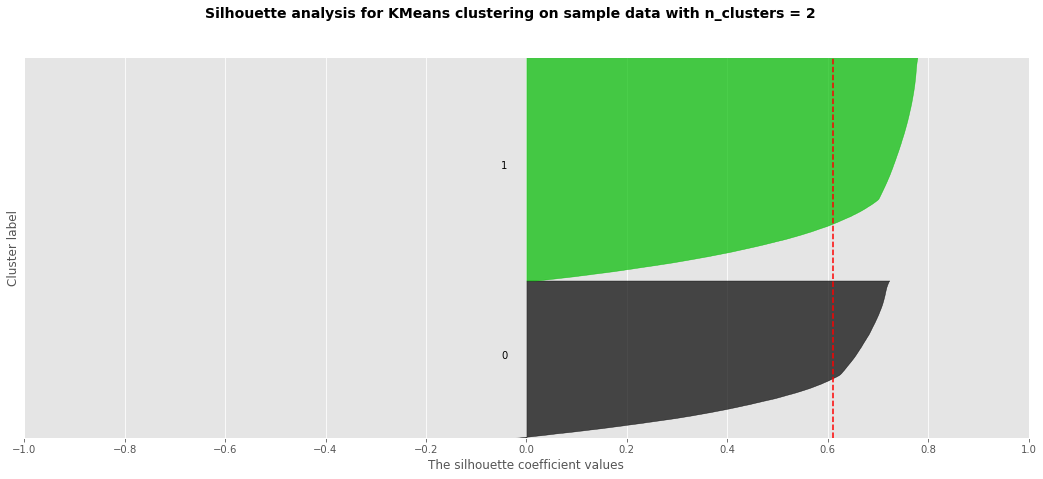

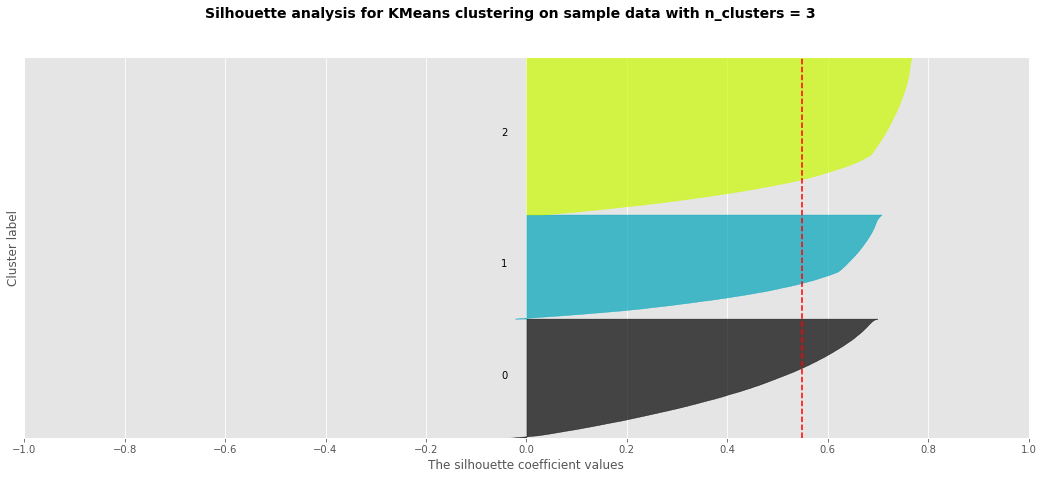

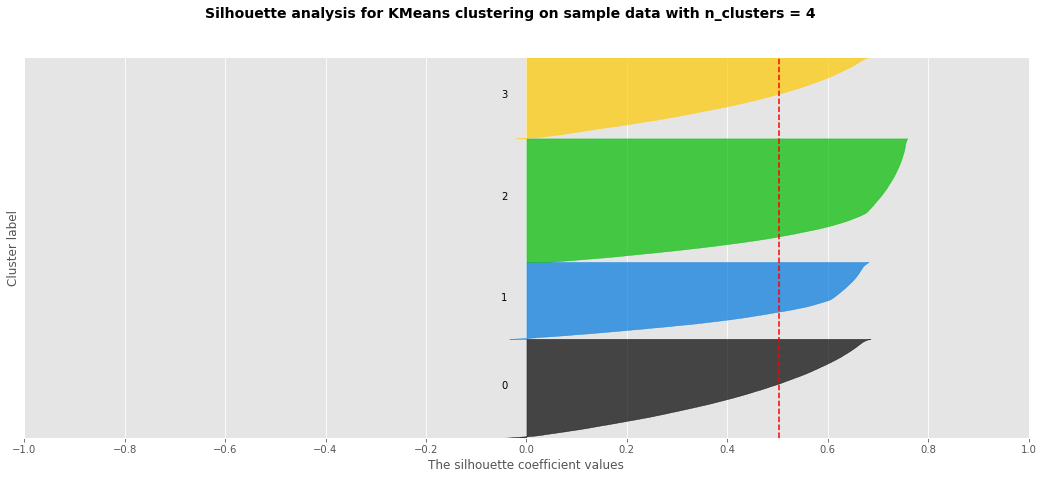

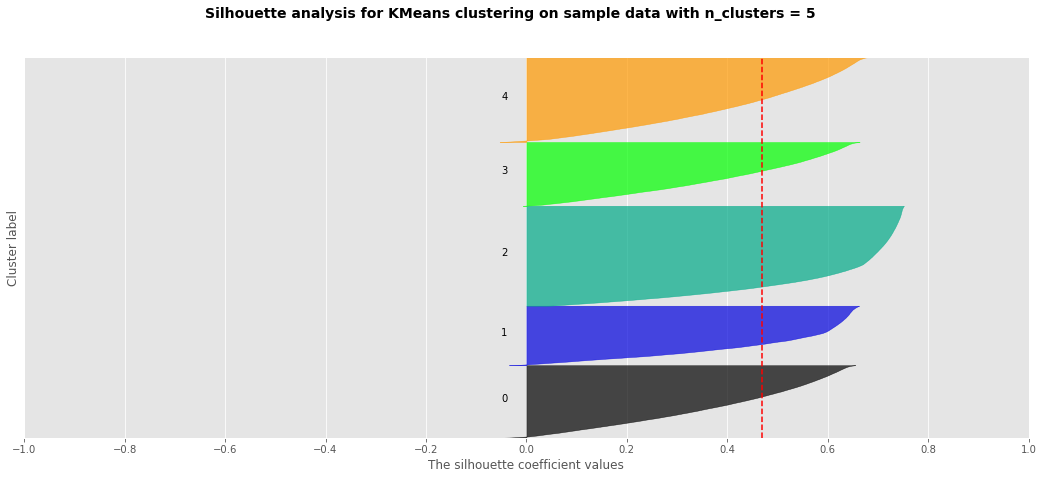

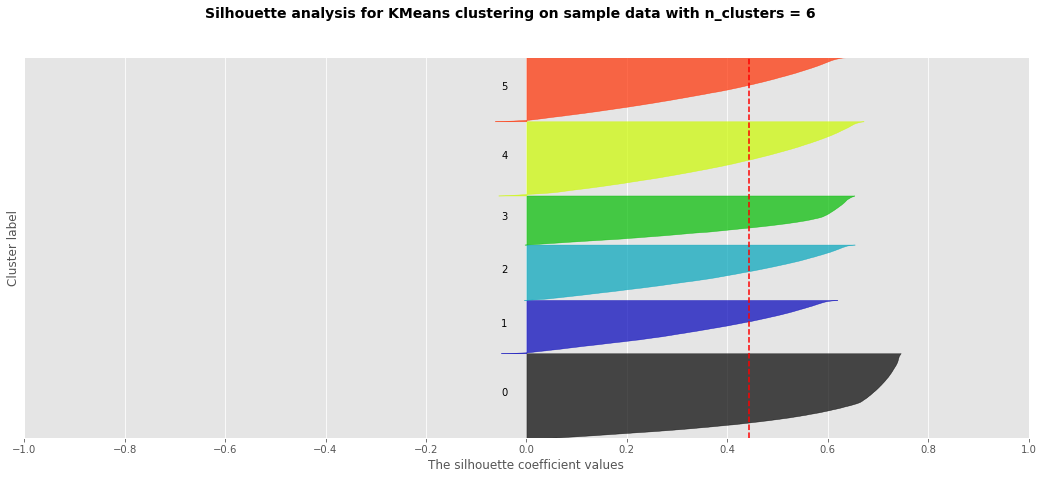

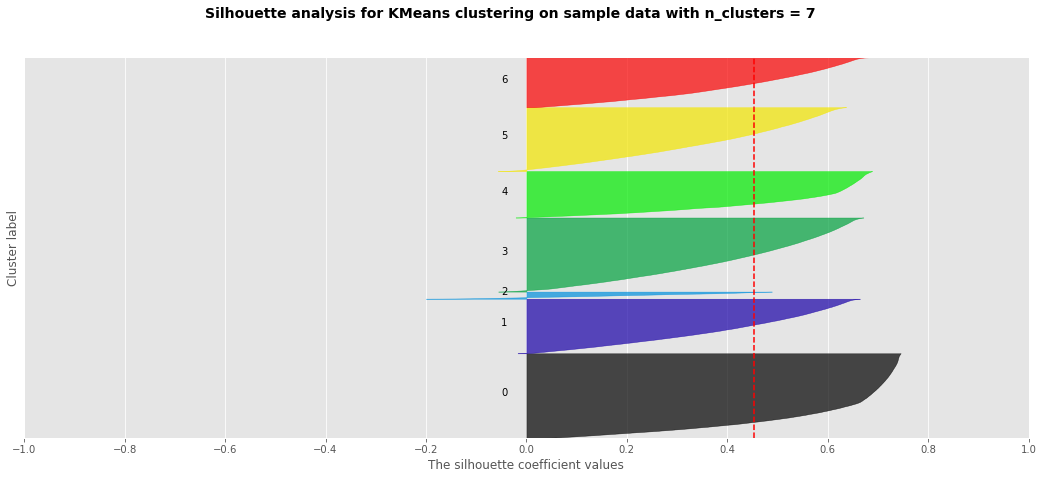

In [8]:
kmeans = kmeans[1:]
for n_clusters in range(0,len(kmeans)):
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data_scaled) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed for reproducibility.
    clusterer = kmeans[n_clusters]
    cluster_labels = clusterer.fit_predict(data_scaled)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data_scaled, cluster_labels)
    print("For n_clusters =", clusterer.n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data_scaled, cluster_labels)

    y_lower = 10
    for i in range(clusterer.n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / clusterer.n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    #ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([i/10 for i in range(-10,12,2)])

    

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % clusterer.n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

### BUILD MODEL

In [12]:
kmeans = KMeans(n_clusters=3, n_jobs=NJOBS).fit(data_scaled)
centroids = kmeans.cluster_centers_
print(centroids)

[[7.08642161e-01 7.00467359e-01 2.75482974e-03 ... 1.96642104e-05
  1.65035999e-05 1.80013315e-05]
 [9.77170400e-01 1.70953685e-01 4.48896298e-03 ... 2.52763780e-05
  2.12740389e-05 2.17038569e-05]
 [8.73900480e-01 4.73465776e-01 3.95642238e-03 ... 2.19042899e-05
  1.86199571e-05 2.70782505e-05]]


### SAVE MODEL

In [13]:
# save the model to disk
filename = '../../../output/models/kmeans_002.model'
pickle.dump(kmeans, open(filename, 'wb'))